# Seaborn

## Objetivo de Seaborn

- Una librería orientada a sintetizar buenas prácticas respecto a la visualización de datos, considerando el marco de análisis en ciencia de datos con `pandas`, `numpy` y `matplotlib`.
- De esta manera nos centramos más en el _análisis_ que en el código para realizar gráficos estándares.

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use("seaborn")

# Se importa seaborn según convención
import seaborn as sns

# Se almacenan datos en DataFrame
df = pd.read_csv("qog_std_cs_jan18.csv")

## Gráfico distributivo
- Se puede graficar conjuntamente la curva de densidad empírica e histograma con el método `displot`.
- Actualmente, utilizando `distplot` (con una 't'), permite graficar además la curva de densidad teórica con el parámetro `fit` y el argumento `stats.norm`, pero en un futuro este método se descontinuará, y solo estará disponible `displot`, el cual requiere graficar a parte la curva de densidad teórica.

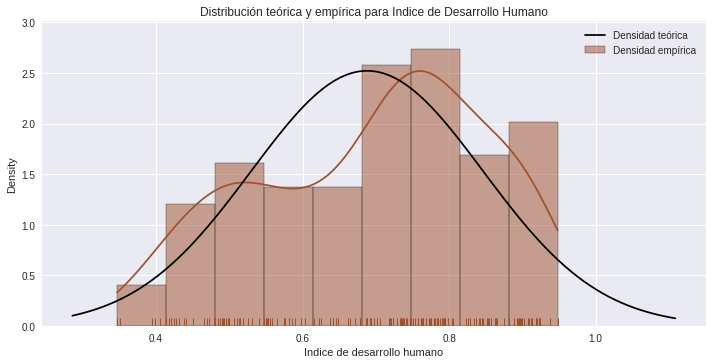

In [3]:
# Se generan 200 datos provenientes de una distribución normal con media y desviación estándar de la distribución empírica
data = np.random.normal(df["undp_hdi"].mean(), df["undp_hdi"].std(ddof=1), 200)

# Se crean los datos del eje x para la curva de densidad teórica
x_teorical = np.linspace(data.min(), data.max(), 100)

# Se grafica histograma y curva de densidad empírica
sns.displot(
    df["undp_hdi"],            # Variable continua de la cual se desea graficar su densidad empírica
    rug=True,                  # Agrega una pequeña línea vertical en el eje x para cada ocurrencia
    kde=True,                  # Agrega curva de densidad empírica
    stat="density",            # Grafica densidad en lugar de frecuencia absoluta
    color="sienna",            # Cambia color de curva e histograma
    label="Densidad empírica", # Agrega leyenda de histograma
    height=5,                  # Entrega el alto del gráfico
    aspect=2                   # Entrega el ancho del gráfico
)

# Se grafica curva de densidad teórica
plt.plot(x_teorical, stats.norm.pdf(x_teorical, *stats.norm.fit(data)), color="black", label="Densidad teórica")

# Extras
plt.title("Distribución teórica y empírica para Indice de Desarrollo Humano")
plt.xlabel("Indice de desarrollo humano")
plt.legend();

## Conteo de frecuencias
- Puede usarse un gráfico horizontal o vertical
- En general se recomienda usar barras del mismo color, siempre que se esté graficando el mismo atributo. También se indica destacar con un tono más oscuro las mayores frecuencias.
- Usa las paletas de colores de `matplotlib`: https://matplotlib.org/stable/tutorials/colors/colormaps.html ; Para "revertir el orden de colores", se debe agregar "_r" al final del nombre de la paleta.

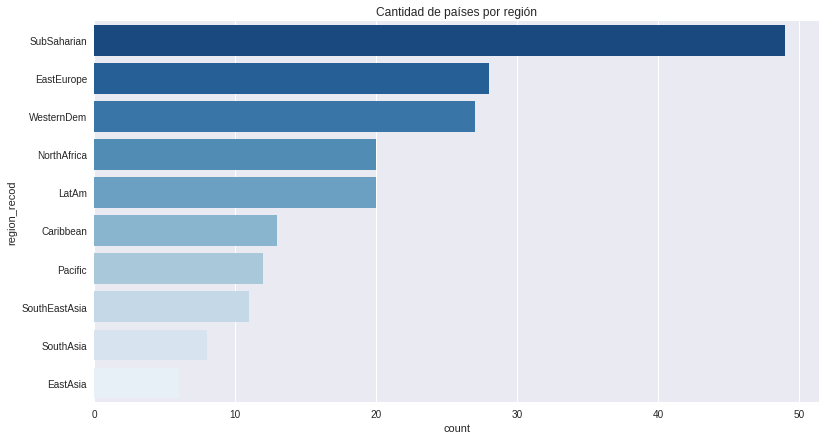

In [4]:
# Se realiza recodificación de las regiones
df["region_recod"] = df["ht_region"].replace(
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    ["EastEurope", "LatAm", "NorthAfrica", "SubSaharian", "WesternDem", "EastAsia", "SouthEastAsia", "SouthAsia", "Pacific", "Caribbean"]
)

plt.figure(figsize=(13,7))

# Se realiza gráfico de barras
sns.countplot(
    y=df["region_recod"],                          # Variable a graficar
    order=df["region_recod"].value_counts().index, # Entrega el orden de las barras de arriba hacia abajo, en base a las etiquetas del eje y; Usa los índices de value_counts (mayor a menor frec.)
    palette="Blues_r"                              # Asigna paleta de colores, dando un color más oscuro a la región de mayor frecuencia  
)

# Extras
plt.title("Cantidad de países por región");

### Conteo de frecuencias condicional a un factor
- Se agrega como argumento para el parámetro `hue` una variable categórica para la cual se quiera separar el conteo de cada frecuencia

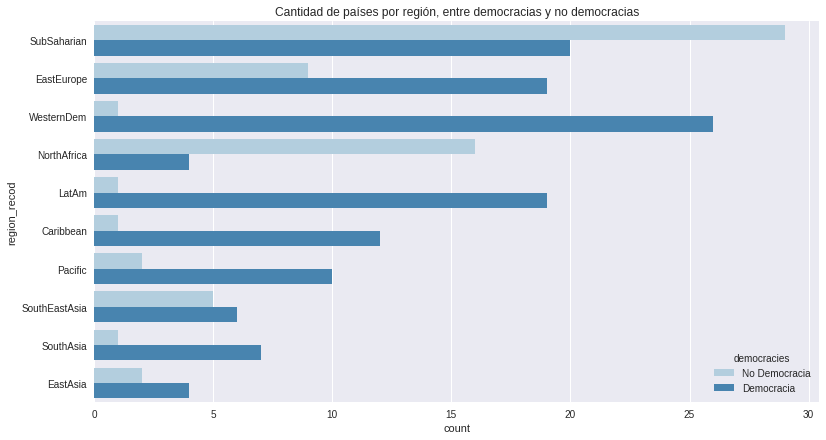

In [5]:
# Se crea variable binaria "democracies"
df["democracies"] = np.where(df['gol_inst'] <= 2, 'Democracia', 'No Democracia')

plt.figure(figsize=(13,7))

sns.countplot(
    y=df["region_recod"],
    hue=df["democracies"],                         # Se agrega parámetro hue que divide cada conteo según una variable categórica
    order=df["region_recod"].value_counts().index,
    palette="Blues"                                # Se usa paleta no invertida; Asigna azul claro a No Democracia, y azul oscuro a Democracia
)

# Extras
plt.title("Cantidad de países por región, entre democracias y no democracias");

## Swarmplot

- Otra forma de graficar frecencias de una variable categórica, haciendo el cruce con una variable continua.
- Grafica un punto en la ubicación de cada elemento según su valor del eje x, para su correspondiente categoría, sin superponer los puntos.
- Normalmente se usa si es que no existen muchos datos.

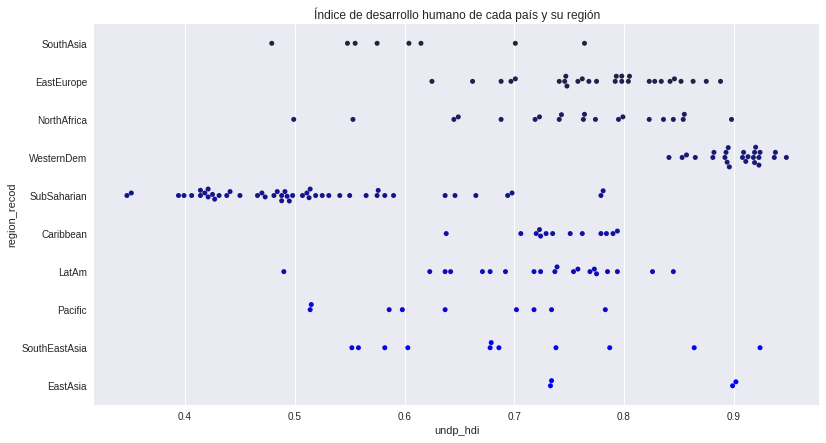

In [6]:
plt.figure(figsize=(13,7))

custom_palette = sns.dark_palette("blue", 10) # Genera una paleta oscura de 10 colores azules

# Se realiza swarmplot
sns.swarmplot(
    x=df["undp_hdi"],     # Se indica valores para el eje x
    y=df["region_recod"], # Se indica valores para el eje y
    palette=custom_palette
)

plt.title("Índice de desarrollo humano de cada país y su región");

## FacetGrid

- `FacetGrid` nos permite graficar múltiples figuras condicional a un valor en específico.
- Flujo de trabajo con `FacetGrid`:
    - Iniciar un objeto con `sns.FacetGrid` declarando el `DataFrame` y las variables.
    - Aplicar una o más funciones mediante `map` o `map_dataframe`.

/home/oscar/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


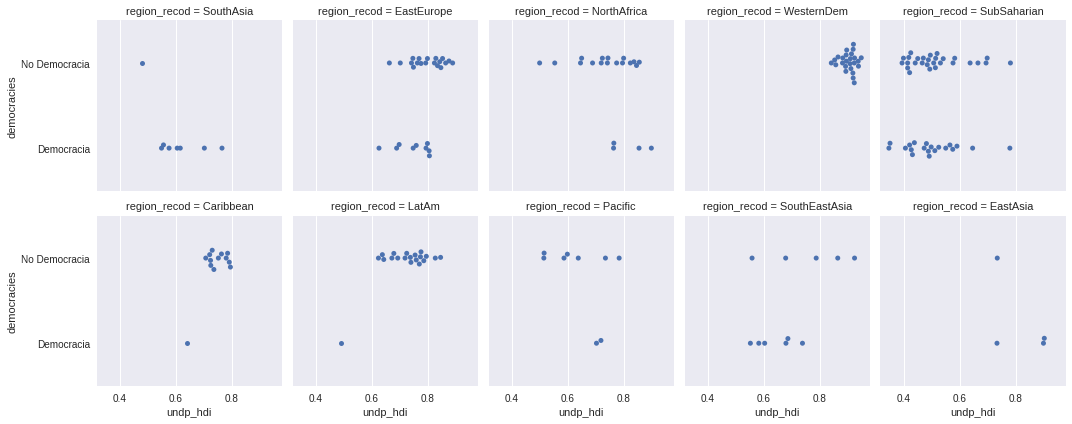

In [7]:
# Se inicia la grilla 
g = sns.FacetGrid(
    df,                 # Set de datos
    col_wrap=5,         # Cantidad de columnas de la grilla
    col="region_recod"  # Columna categórica que indica las columnas de la grilla
)

# Se realiza mapeo
g.map(
    sns.swarmplot,     # Se indica tipo de gráfico para cada gráfico de la grilla
    "undp_hdi",        # Se indica eje x de cada gráfico de la grilla
    "democracies"      # Se indica eje y de cada gráfico de la grilla
);

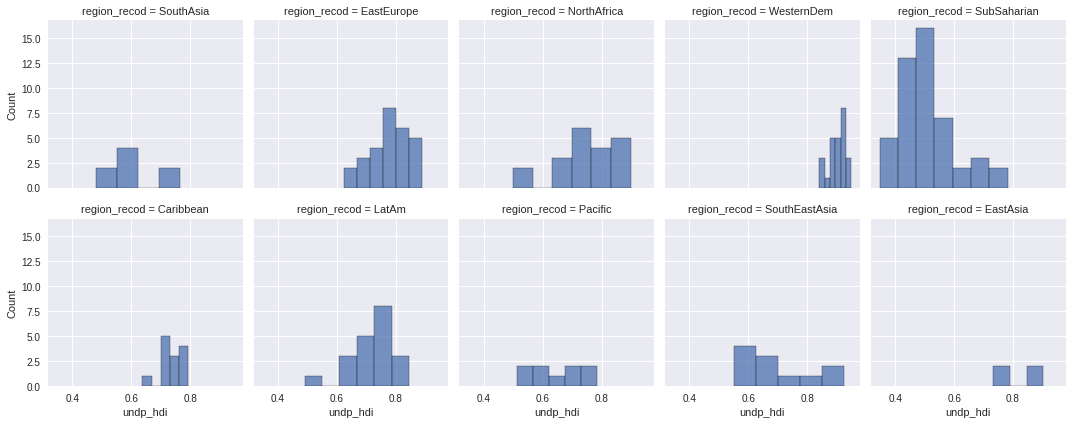

In [8]:
# Se debe volver a iniciar la grilla
g = sns.FacetGrid(df, col_wrap=5, col="region_recod")

# Ejemplo map_dataframe
g.map_dataframe(
    sns.histplot, # Se indica tipo de gráfico
    x="undp_hdi"  # Se indica variable del eje X
);

## Scatterplots

- Un scatterplot o diagrama de dispersión resume el comportamiento entre dos variables.
- Para ello, asume que cada registro se conforma de coordenadas (x, y).
- Mediante los diagramas de dispersión podemos observar “qué tan juntas” viajan dos variables

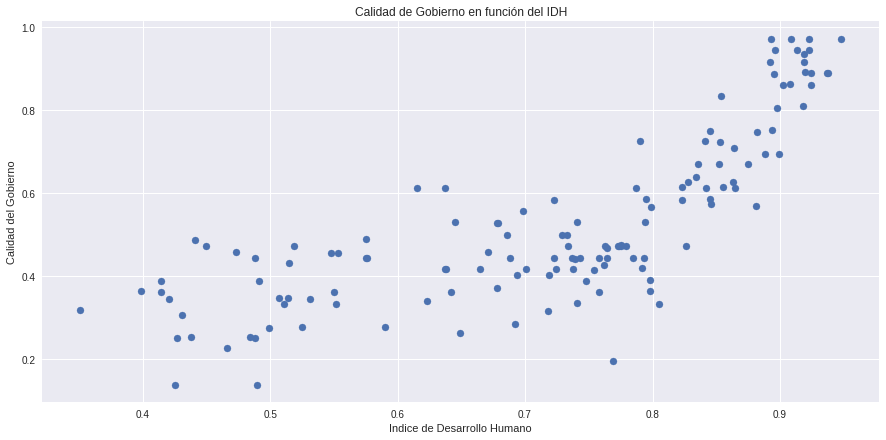

In [9]:
plt.figure(figsize=(15, 7))

# Generamos el gráfico
plt.scatter(
    x=df['undp_hdi'], # Se indica variable del eje X
    y=df['icrg_qog']  # Se indica variable del eje y
)

# Extras
plt.title('Calidad de Gobierno en función del IDH')
plt.xlabel("Indice de Desarrollo Humano")
plt.ylabel("Calidad del Gobierno");

- En `seaborn` se debe usar `regplot`, que también agrega la línea de regresión con un intervalo de confianza

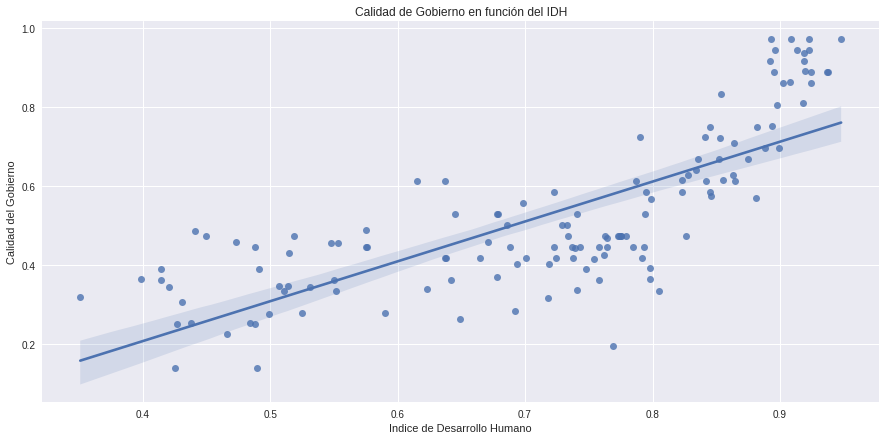

In [10]:
plt.figure(figsize=(15, 7))

# Generamos el gráfico
sns.regplot(
    x=df['undp_hdi'], # Se indica variable del eje X
    y=df['icrg_qog']  # Se indica variable del eje y
)

# Extras
plt.title('Calidad de Gobierno en función del IDH')
plt.xlabel("Indice de Desarrollo Humano")
plt.ylabel("Calidad del Gobierno");

- También se puede usar `jointplot` que además agrega histogramas con la curva de densidad en los ejes

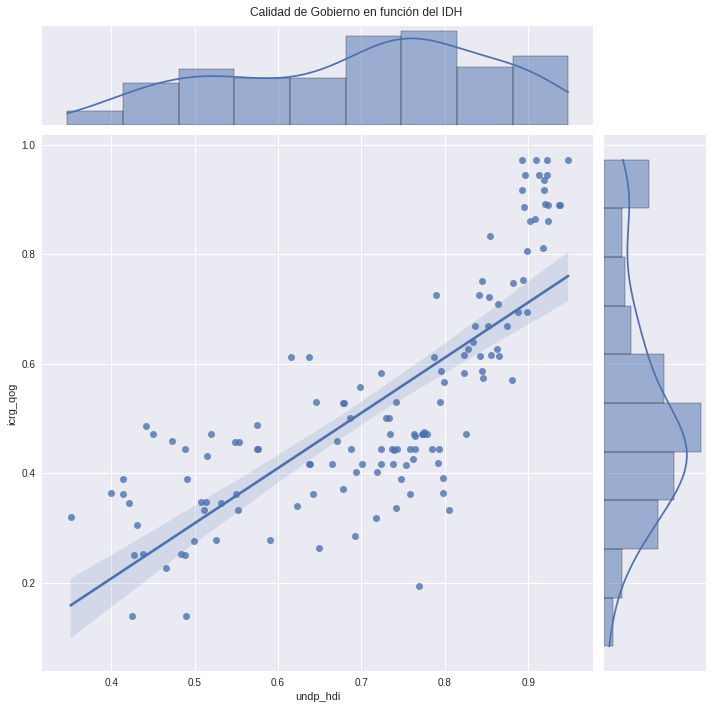

In [11]:
# Se genera gráfico
sns.jointplot(
    x=df['undp_hdi'], # Se indica variable del eje X
    y=df['icrg_qog'], # Se indica variable del eje y
    kind="reg",       # Agrega curva de densidad empírica y línea de regresión
    height=10,        # Entrega el alto del gráfico (solo permite figuras cuadradas)
)

# Extras
plt.suptitle('Calidad de Gobierno en función del IDH') # Debe usar "suptitle" en lugar de "title" para ubicar el título sobre el histograma
plt.xlabel("Indice de Desarrollo Humano")
plt.ylabel("Calidad del Gobierno");
plt.tight_layout() # evita que se superponga el título en el gráfico

## Boxplots

- Son un tipo de gráfico que permite mostrar gráficamente los cuartiles de una serie de datos.
- Permiten detectar de forma visual la presencia de valores atípicos (outliers) univariados.

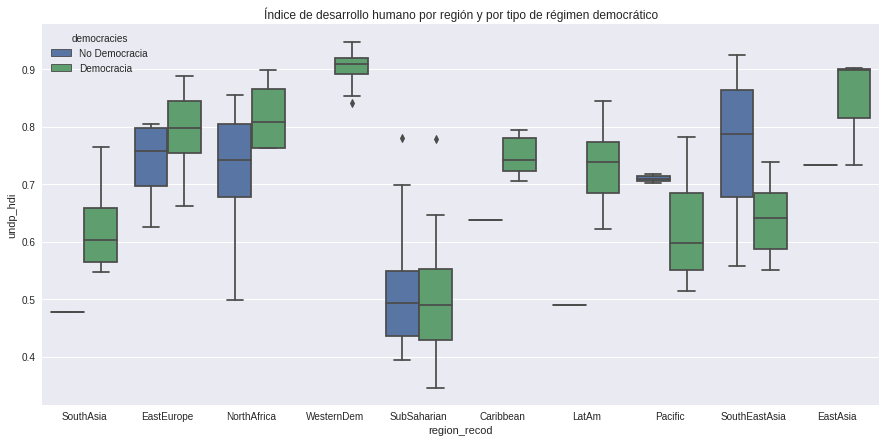

In [12]:
plt.figure(figsize=(15, 7))

sns.boxplot(
    x="region_recod", # Variable categórica del eje x, donde para cada categoría se hará un boxplot en la variable continua indicada para el eje y
    y="undp_hdi",     # Variable continua del eje y para la que se graficará el boxplot
    data=df,          # Se indica el set de origen de datos
    hue="democracies" # Variable categórica para subdividir bocplots; Para cada región del eje x, se generará además 2 gráficos, uno para democracias, y otro para no democracias.
)

plt.title("Índice de desarrollo humano por región y por tipo de régimen democrático");

# Correlación

## Preliminares
- La correlación y covarianza son piedras angulares para métodos más sofisticados.
- Nos permiten caracterizar cómo se comportan _conjuntamente_ 2 variables _continuas_; _"(Covarianza y correlación) describen el grado en el cual dos variables aleatorias (...) tienden a desviarse de sus valores esperados (esperanzas)"_ (<a href="https://en.wikipedia.org/wiki/Covariance_and_correlation">wiki</a>).
- La _covarianza_ se suele denotar como $\sigma$ o simplemente $Cov$, mientras que la correlación se suele denotar con la letra "rho" $\rho$.

$$
\DeclareMathOperator{\Cov}{Cov}
\DeclareMathOperator{\E}{\mathbb{E}}
\begin{align}
\Cov[X,Y] &= \E[(X-\mu_x)(Y-\mu_y)] \\
&= \frac{\sum_{i=1}^{n}(x_i- \bar X)(y_i - \bar Y)}{n - 1}
\end{align}
$$
<br />
<br />
$$
\DeclareMathOperator{\Corr}{Corr}
\DeclareMathOperator{\Cov}{Cov}
\DeclareMathOperator{\Var}{Var}
\DeclareMathOperator{\E}{\mathbb{E}}
\begin{align}
\Corr[X,Y] &= \frac{\E[(X-\mu_x)(Y-\mu_y)]}{(\sigma_x \sigma_y)} \\
&= \frac{\Cov[X,Y]}{\sqrt{Var(X)}\sqrt{Var(Y)}}
\end{align}
$$
<br />
- Normalmente para la interpretación se utiliza la _correlación_, ya que siempre entrega valores entre -1 y 1.
<br />
<br />

**Nota**

Como vemos, se está usando la _Esperanza_ para la distribución normal. Sin embargo, en la práctica muchas veces se usa esta fórmula de correlación, llamada _correlación de Pearson_, aunque la distribución de las variables _no sea gausiana_, aunque otros prefieren utilizar otro tipo de correlación en esos casos, como la _correlación de Spearman_ (test no paramétrico que no requiere normalidad).

## Intuición
- Dos elementos a tomar en cuenta:
    - La pendiente de la recta.
    - La dispersión de los puntos respecto a la recta.
<br />
<br />
- Valores _**positivos**_ = Asociación proporcional _**directa**_ entre x e y.
<br />
<br />
- Valores _**negativos**_ = Asociación proporcional _**inversa**_ entre x e y.

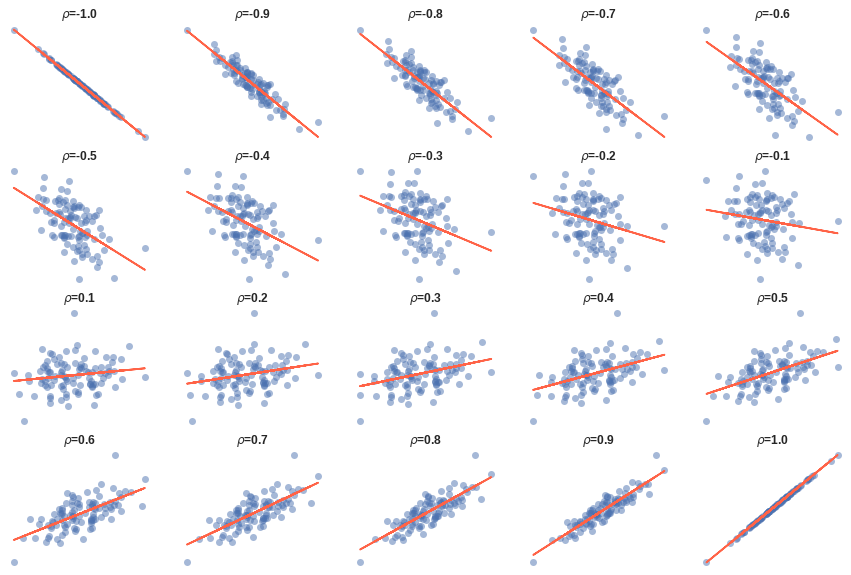

In [13]:
import lec4_graphs as gfx

plt.figure(figsize=(15, 10))
gfx.generate_corr_matrix()

- Anteriormente vimos que las variables `undp_hdi` e `icrg_qog` "parecen viajar bastante juntas". ¿Qué valor de correlación de Pearson se obtiene?

In [14]:
# El método corr de pandas por defecto calcula la correlación de Pearson
df["undp_hdi"].corr(df["icrg_qog"])

0.7694078965882001

- Sin embargo, al revisar los histogramas de cada variable, parecen no seguir una distribución normal. Se realiza el test estadístico de <a href="https://bookdown.org/dietrichson/metodos-cuantitativos/test-de-normalidad.html">Shapiro</a> para corroborarlo.

In [15]:
# Test estadístico que nos indica si una variable tiene distribución gausiana o no
from scipy.stats import shapiro

for i in ["undp_hdi", "icrg_qog"]:
    nn = df[i].dropna() # Se debe eliminar los nulos para realizar el test
    print(f'{i}: {"No es Gausiana" if shapiro(nn)[1] < 0.05 else "Es Gausiana"}. Test: {shapiro(nn)}')

undp_hdi: No es Gausiana. Test: ShapiroResult(statistic=0.9543584585189819, pvalue=1.055458233167883e-05)
icrg_qog: No es Gausiana. Test: ShapiroResult(statistic=0.9452174305915833, pvalue=2.7257896363153122e-05)


- Se explora entonces la correlación de Spearman

In [16]:
df["undp_hdi"].corr(df["icrg_qog"], method="spearman")

0.8104887080027806

## Formas de visualizar correlaciones

### Heatmap

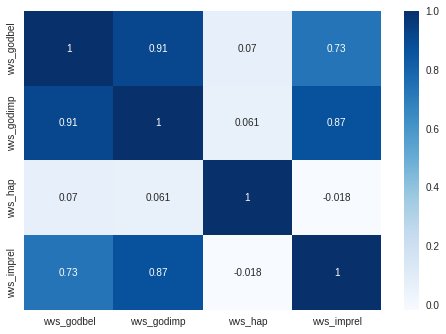

In [17]:
# Se crea subset de variables
working_subset = df[['wvs_godbel', 'wvs_godimp', 'wvs_hap', 'wvs_imprel']]

# Se extrae su correlación (de Pearson)
corr_mat = working_subset.corr()

# Se implementa el método sns.heatmap
sns.heatmap(
    corr_mat,      # Se entrega matriz de correlaciones
    cmap="Blues",  # Se entrega mapa de colores
    annot=True     # Se indica que se quiere indicar el valor obtenido de la correlación en cada cruce
);

- Se explora correlación de Spearman

In [18]:
for i in working_subset.columns:
    nn = df[i].dropna() # Se debe eliminar los nulos para realizar el test
    print(f'{i}: {"No es Gausiana" if stats.shapiro(nn)[1] < 0.05 else "Es Gausiana"}. Test: {stats.shapiro(nn)}')

wvs_godbel: No es Gausiana. Test: ShapiroResult(statistic=0.7089273929595947, pvalue=1.2010548111618391e-08)
wvs_godimp: No es Gausiana. Test: ShapiroResult(statistic=0.8720107078552246, pvalue=4.081012957612984e-05)
wvs_hap: No es Gausiana. Test: ShapiroResult(statistic=0.8872039318084717, pvalue=9.195524762617424e-05)
wvs_imprel: No es Gausiana. Test: ShapiroResult(statistic=0.9133545160293579, pvalue=0.0007504744571633637)


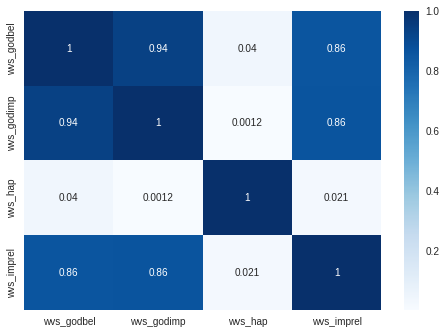

In [19]:
# Se extrae su correlación (de Spearman)
corr_mat_sp = working_subset.corr(method="spearman")

# Se implementa el método sns.heatmap
sns.heatmap(corr_mat_sp, cmap="Blues", annot=True);

### PairGrid

- Ojo, puede tomar mucho tiempo en sets muy grandes

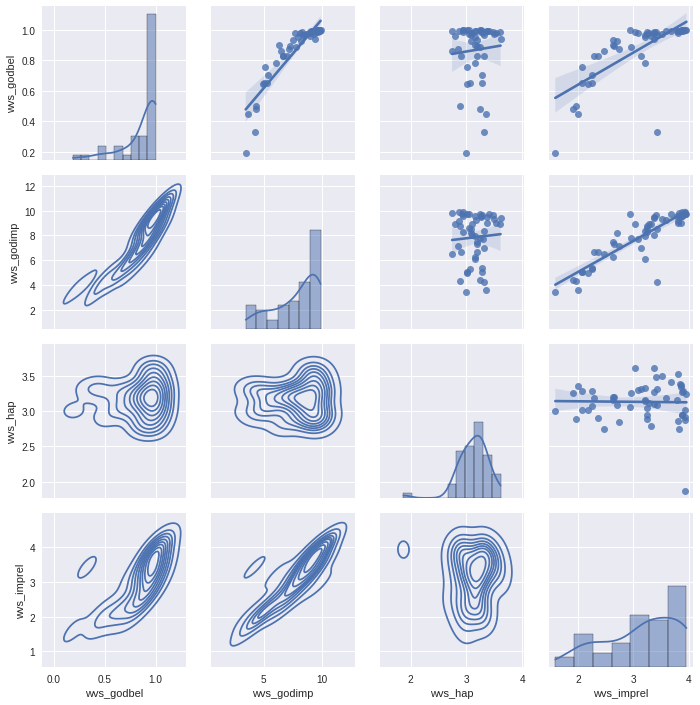

In [20]:
grid = sns.PairGrid(working_subset)                          # Genera grilla de gráficos
grid = grid.map_diag(sns.histplot, kde=True)                 # En la diagonal realizará histograma y curva de densidad
grid = grid.map_lower(sns.kdeplot)                           # En el triángulo ingerior realizará curvas de nivel
grid = grid.map_upper(sns.regplot)                           # En el triángulo superior realizará scatterplot con línea de regresión

# Hipótesis

## Objetivo
- **Idea fundacional de la inferencia estadística**: Tomar decisiones o esclarecer juicios en base a información limitada.
- **Definición de hipótesis**: En estadística, se refiere a un juicio empíricamente comprobable sobre la relación entre dos o más variables.

En el contexto estadístico, para realizar pruebas de hipótesis debemos seguir una serie de pasos:
- Definir enunciados de hipótesis.
- Definir un estadístico de prueba.
- Definir una distribución de la hipótesis nula.
- Definir un puntaje de corte.

### Definición de las hipótesis

- **Hipótesis nula**: Es la hipótesis que establece que nuestro punto estimado es nulo (o en términos generales, que no hay efecto). Se denota $H_0$.
- **Hipótesis alternativas**: Es la hipótesis que nosotros como investigadores conjeturamos. Se denota $H_1$.

**Ejemplo**
- $H_0: \mu >= 155$
- $H_1: \mu < 155$

### Calculando estadísticos de prueba
- Tienen como objetivo medir la diferencia entre un estadístico observado y su parámetro hipotético de población. Es decir, permite comparar dos parámetros con el fin de decidir si se _rechaza_ $H_0$, o si se _falla en rechazar_ $H_0$.
- Existen <a href="https://es.wikipedia.org/wiki/Contraste_de_hip%C3%B3tesis#Test_estad%C3%ADsticos">distintos estadísticos de prueba</a>, los cuales dependen de la <a href="https://en.wikipedia.org/wiki/Chi-squared_test">distribución</a> a la que pertenecen los datos a los que se quiere aplicar el test de hipótesis, de los parámetros a contrastar, de las muestras, de los datos con los que se cuenta, entre otros.
- Uno de los más utilizados es el _z-test_, o "pivote", que se aplica a datos $\sim \mathcal{N}(\mu, \sigma^2)$, y se calcula de la siguiente forma (para una muestra):

$$
\begin{align}
z&=\frac{\hat \theta -  \Theta}{\sigma / \sqrt{n}} \\
z &\sim \mathcal{N}(0, 1)
\end{align}
$$
- Donde:
    - $z$: Puntaje Z
    - $\hat \theta$: Estimador del parámetro / valor de la muestra
    - $\Theta$: Parámetro real / valor de la población (valor con el cual se contrasta el muestral)
    - $\sigma$: Desviación estándar de la población
    - $n$: Tamaño de muestra
    - $\sigma/\sqrt{n}$: Error estándar
    
    
 - Se llama "pivote", porque en la medida que se tiene $n$ grande, se puede aplicar este test a datos de _cualquier distribución_, ya que sus medias distribuirán en forma Normal, por teorema del límite central (o normalidad asintótica).

**Ejemplo pivote aplicando TLC: Distribución <a href="https://es.wikipedia.org/wiki/Distribuci%C3%B3n_Bernoulli">Bernoulli</a>**
- Si $X$ es una variable aleatoria discreta que mide el "número de éxitos" y se realiza un único experimento con dos posibles resultados denominados _éxito_ y _fracaso_, se dice que la variable aleatoria $X$ se distribuye como una Bernoulli de parámetro $p$ con $o < p < 1$ y escribimos $X \sim \mathcal{Bernoulli}(p)$.
- Su **media** corresponde a $p$.
- Su **varianza** corresponde a $p(1-p)$.
- Para $n$ grande, se puede aplicar el siguiente test estadístico de pivote:

$$
\begin{align}
z = \frac{\hat p - p}{\sqrt{p(1-p)/n}}
\end{align}
$$

### Uso del estadístico de prueba $z \sim \mathcal{N}(0, 1)$
- El valor de $z$ obtenido es constrastado con un "_z crítico"_, o "punto de corte", escogido previamente, el cual se asocia a un _nivel de confianza_. 
- El _nivel de confianza_ se asocia a un valor de _error_ máximo permitido o de _significancia_ el cual se denota como $\alpha$. El _nivel de confianza_ corresponde a $1 - \alpha$:
    - A _menor error permitido_, se tiene entonces una _mayor confianza en el test_
    - A _mayor nivel de confianza_, se necesita _un valor más extremo_ del estadístico (menos probable) para _rechazar $H_0$_.
- Dependiendo del test de hipótesis planteado, el contraste realizado determinará una _zona de rechazo_ o _región crítica_, denotada $R^*$, que indicará si _se rechaza $H_0$_, o si _se falla en rechazar_ $H_0$.

<table>
  <tr>
      <th width="15%">$z$ test</th>
    <th width="15%">$H_0$</th>
    <th width="15%">$H_1$</th>
    <th width="15%">Condición de rechazo de $H_0$</th>
      <th width="15%"><i>z crítico</i> con $\alpha = 0.1$</th>
      <th width="15%"><i>z crítico</i> con $\alpha = 0.05$</th>
      <th width="15%"><i>z crítico</i> con $\alpha = 0.01$</th>
  </tr>
  <tr>
      <td>Dos colas</td>
    <td>$\hat \theta = \Theta$</td>
    <td>$\hat \theta \neq \Theta$</td>
      <td>$z \leq$ <i>-z crítico</i><br />$z \geq$ <i>+z crítico</i></td>
      <td>$\pm 1.65$</td>
      <td>$\pm 1.96$</td>
      <td>$\pm 2.58$</td>
  </tr>
  <tr>
      <td>Cola derecha</td>
    <td>$\hat \theta \leq \Theta$</td>
    <td>$\hat \theta > \Theta$</td>
    <td>$z \geq$ <i>+z crítico</i></td>
      <td>$1.28$</td>
      <td>$1.65$</td>
      <td>$2.33$</td>
  </tr>
  <tr>
      <td>Cola izquierda</td>
    <td>$\hat \theta \geq \Theta$</td>
    <td>$\hat \theta < \Theta$</td>
    <td>$z \leq$ <i>-z crítico</i></td>
      <td>$-1.28$</td>
      <td>$-1.65$</td>
      <td>$-2.33$</td>
  </tr>
</table>

In [21]:
def plot_critical_regions(alphas, zetas, colas="dos"):
    n = len(alphas)
    colores = plt.cm.Blues(np.linspace(0.4, 1, n))
    
    # Datos para graficar densidad
    x = np.linspace(stats.norm.ppf(0.001), stats.norm.ppf(0.999), 10000)
    signo = "\pm" if colas == "dos" else "+" if colas == "derecha" else "-"

    for i in range(n):
        etiqueta = fr"$R^*$ con $\alpha = {alphas[i]}$ y $z$ crítico ${signo}$" + f"{round(zetas[i], 3)}"
        
        # Región crítica
        if colas in ["dos", "derecha"]:
            rc_der = x[x >= +zetas[i]]
            plt.fill_between(rc_der, 0, stats.norm.pdf(rc_der, 0, 1), color=colores[i], label=etiqueta, alpha=0.8)

        if colas in ["dos", "izquierda"]:
            rc_izq = x[x <= -zetas[i]]
            plt.fill_between(rc_izq, 0, stats.norm.pdf(rc_izq, 0, 1), color=colores[i], label=etiqueta if colas == "izquierda" else None, alpha=0.8)


    # Plot densidad
    plt.plot(x, stats.norm.pdf(x, 0, 1), color="dodgerblue", lw=2, label=r'Función de densidad $\mathcal{N}(0, 1)$')

    # Extras
    plt.xlabel(r"$z$")
    plt.ylabel("Densidad")
    plt.title(fr"Zona de rechazo estadístico $z$ con {'2 colas' if colas == 'dos' else 'cola ' + colas}", pad=60)
    plt.legend(ncol=2, loc="upper center", bbox_to_anchor=(0.5,1.25));

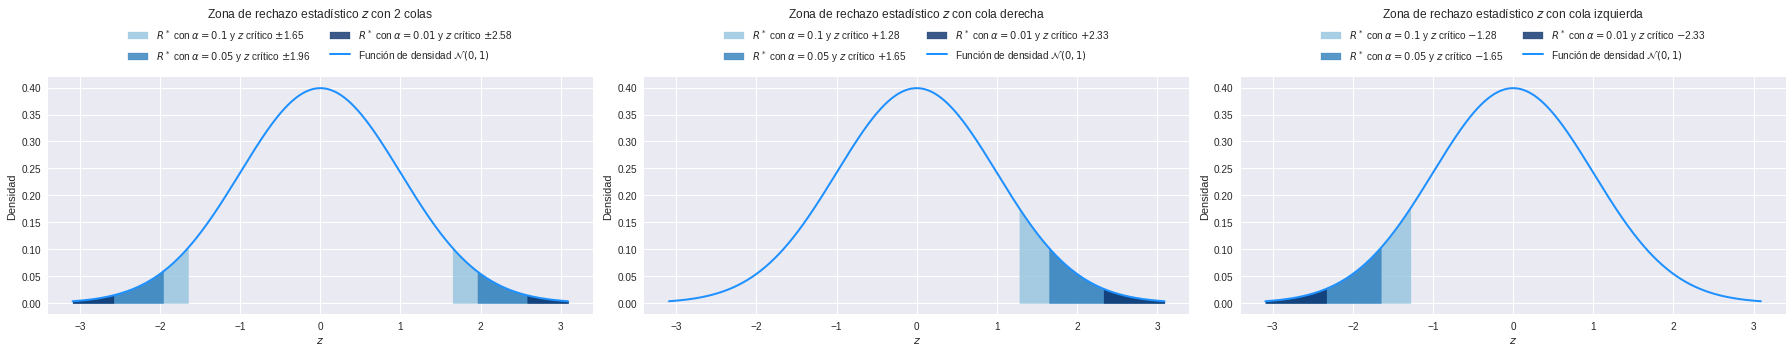

In [22]:
alphas = [0.1, 0.05, 0.01]
plt.figure(figsize=(25,5))

plt.subplot(1,3,1) # Con plt.subplot definimos una grilla en matplotlib: N filas, N columnas, posición del siguiente gráfico
plot_critical_regions(alphas, [1.65, 1.96, 2.58])

plt.subplot(1,3,2)
plot_critical_regions(alphas, [1.28, 1.65, 2.33], "derecha")

plt.subplot(1,3,3)
plot_critical_regions(alphas, [1.28, 1.65, 2.33], "izquierda")

plt.tight_layout()

### Determinar el _z crítico_

- Vemos entonces que para _obtener el valor del z crítico_, se debe fijar un _valor de $\alpha$_ y una cantidad de colas para el test. Teniendo estos datos, se puede hacer uso de `stat.norm.ppf` para obtener un valor de z crítico.
    - **Nota**: Antiguamente, y aún hay gente que lo hace así, para obtener los "valores críticos" (para el estadístico $z$ y para otros estadísticos de otras distribuciones), se utilizaba tablas de valores que podían tener muchas páginas. Hoy en día, gracias a lenguajes como R o Phython, ¡ya no es necesario!.
    - **Nota2**: Lo correcto es fijar el valor de $\alpha$ _antes_ de realizar el o los experimentos.

In [23]:
# Se define una pequeña función
def obtener_z_critico(alpha=0.05, colas=2):
    z_critico = stats.norm.ppf(1 - alpha / colas)
    return z_critico

In [24]:
alpha_a = 0.0001
z_critico = obtener_z_critico(alpha=alpha_a)

print(f"El valor z crítico para un test de 2 colas con alpha=0.01 corresponde a {round(z_critico, 3)}")

El valor z crítico para un test de 2 colas con alpha=0.01 corresponde a 3.891


### El estadístico $t$

- Una desventaja del $z$ _test_ es que requiere del valor de $\sigma$, el cual rara vez se tiene disponible.
- Es por ello que, cuando se tiene datos de una distribución normal con _**$n$ pequeño, y no se conoce $\sigma$**_, se debe utilizar el $t$ _test_ en lugar del $z$ _test_:

$$
\begin{align}
t_{n-1} = \frac{\bar X - \mu}{S / \sqrt{n}}
\end{align}
$$

- Donde:
    - $t_{n-1}$: Estadístico $t$ para $n-1$ grados de libertad, siendo $n$ el tamaño muestral.
    - $\bar X$: Promedio en la muestra de datos
    - $\mu$: Valor de referencia / Media poblacional o de contraste
    - $S$: Desviación estándar en la muestra de datos (estimador insesgado de $\sigma$)
    
- Recordar que _si $n$ es pequeño, no se puede pivotear aplicando TLC_, y por ende se debe aplicar el estadístico correspondiente a la distribución de los datos.
- Si $n$ es grande, en la práctica igual se utiliza el $z$ test, aunque $\sigma$ sea desconocida, ya que con $n$ grande $S = \hat \sigma \rightarrow \sigma$ (se utiliza $S$ en lugar de $\sigma$).
- **OJO**: Los valores críticos de $t$ _no son los mismos_ que los de $z$, considerando los mismos $\alpha$ (cada estadístico tiene sus propios valores críticos).

In [25]:
# Para encontrar el t crítico se usa stats.t.ppf
stats.t.ppf(1 - 0.05 / 2, df=34) # 'df' son los grados de libertad (degrees of freedom), que es n - 1

2.032244509317718

## Ejemplo: Prueba de Hipótesis frente a una constante

Sea 
$$
\bar X := \text{Valor promedio de la confianza en las instiuciones para la muestra}
$$

Se quiere realizar un test de hipótesis para verificar si su valor _es significativamente diferente_ del valor de referencia 0.7.

$$
\mu = 0.7
$$

1. Definimos las hipótesis

$$
H_0: \bar X = \mu \\
H_0: \bar X = 0.7 \\
H_1: \bar X \neq 0.7
$$

2. Se define un estadístico de prueba

$$
t_{n-1} = \frac{\bar X - 0.7}{\sqrt{S^2/n}}
$$

3. Posteriormente, definimos frente a qué puntaje de corte contrastamos. Es decir, se define _el nivel de significancia_.

$$
\alpha = 0.01
$$

4. Se obtiene el _$t$ crítico_ para el nivel de significancia y tipo de test escogido.

5. Se calcula el estadístico de prueba $t_{n-1}$ usando $\bar X$, $S$ y $n$ de la muestra.

5. Se contrasta:
    - Si el estadístico $t_{n-1}$ calculado es es menor o igual a _-$t$ crítico_, o mayor o igual a _+$t$ crítico_, entonces _**se rechaza $H_0$**_.
    - En caso contrario, es decir, que el estadístico $t$ calculado sea mayor al _-$t$ critico_ y menor al _+$t$ crítico_, _**se falla en rechazar $H_0$**_.
    
    
**IMPORTANTE: _LAS HIPÓTESIS NO SE "ACEPTAN"; SOLO "SE RECHAZAN", O SE "FALLAN EN RECHAZAR", YA QUE AL SER LA FUNCIÓN DE DENSIDAD ASINTÓTICA, NUNCA PODREMOS CUBRIR EL 100% DE ÁREA BAJO LA CURVA (NUNCA PODREMOS LLEGAR AL 100% DE CONFIANZA)._**

## Noción de Significancia Estadística
- Si tenemos evidencia para rechazar la nula con $\alpha = 0.05$, significa que en un 95% de las iteraciones de experimento, tendremos un resultado similar.

<table>
  <tr>
    <th>$\alpha$</th>
    <th>Cobertura</th>
    <th>Significado</th>
  </tr>
  <tr>
    <td>0.01</td>
    <td>99%</td>
    <td>Si replicamos 100 un experimento bajo condiciones similares, tendremos 99 ocasiones donde el resultado será similar.</td>
  </tr>
  <tr>
    <td>0.05</td>
    <td>95%</td>
    <td>Si replicamos 100 un experimento bajo condiciones similares, tendremos 95 ocasiones donde el resultado será similar.</td>
  </tr>
  <tr>
    <td>0.1</td>
    <td>90%</td>
    <td>Si replicamos 100 un experimento bajo condiciones similares, tendremos 90 ocasiones donde el resultado será similar.</td>
  </tr>
</table>

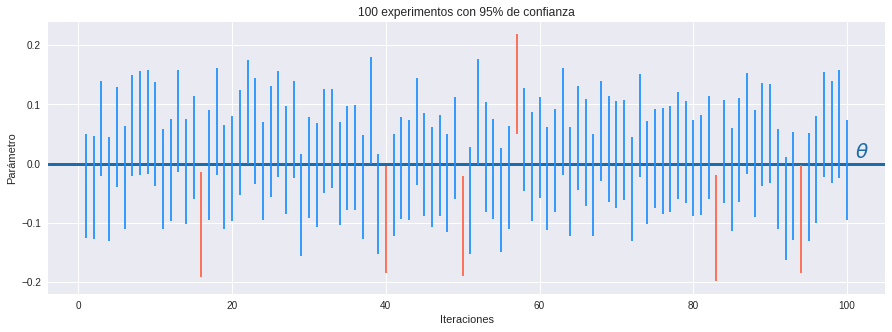

In [26]:
np.random.seed(123)
plt.figure(figsize=(15,5))
gfx.confidence_intervals()
plt.title("100 experimentos con 95% de confianza");

## El _p valor_

<a href="https://es.wikipedia.org/wiki/Valor_p">(Wiki)</a>

- El valor p (conocido también como p, p-valor, valor de p consignado, o directamente en inglés p-value) se define como la _probabilidad de que un valor estadístico calculado sea posible dada una hipótesis nula cierta_.

- En términos simples, el valor p ayuda a diferenciar resultados que son producto del azar del muestreo, de resultados que son estadísticamente significativos.

- Si el valor p cumple con la condición de ser menor que un nivel de significancia impuesto arbitrariamente, este se considera como un resultado estadísticamente significativo y, por lo tanto, permite rechazar la hipótesis nula.

- Es fundamental reforzar que el valor p está basado en la presunción de que una hipótesis nula (o hipótesis de partida) es cierta. El valor p es por tanto una medida de significación estadística.

## Desarrollo del Ejemplo "Prueba de Hipótesis frente a una constante"
- Se calcula el _t crítico_ usando `stats.t.ppf`

In [27]:
# Se define las variables
alpha = 0.05
colas = 2
n = df['wvs_trust'].dropna().shape[0] # No consideramos los nulos como parte de la muestra

# Se calcula el t crítico
t_critico = stats.t.ppf(1 - alpha / colas, df=n-1)

print(f"El valor del t crítico para esta prueba, con 2 colas, un alpha de {alpha}, y {n - 1} grados de libertad, es de más-menos {round(t_critico, 3)}")

El valor del t crítico para esta prueba, con 2 colas, un alpha de 0.05, y 54 grados de libertad, es de más-menos 2.005


- Se calcula el estadístico de prueba según la prueba $t$

In [28]:
# Elementos del numerador
promedio_muestra = df['wvs_trust'].mean()
valor_contraste = 0.7

# Elementos del denominador
varianza_muestra = np.var(df['wvs_trust'], ddof=1)
std_err = np.sqrt(varianza_muestra / n)

# Se calcula el estadístico t
t_statistic = (promedio_muestra - valor_contraste) / std_err

print(
    f"Teniendo una media muestral de {round(promedio_muestra, 2)} y un valor de contraste {valor_contraste}, "
    f"considerando la varianza muestral {round(varianza_muestra, 2)} y un error estándar de {round(std_err, 2)}, "
    f"se obtiene un estadístico t de {round(t_statistic, 2)}"
)

Teniendo una media muestral de 0.24 y un valor de contraste 0.7, considerando la varianza muestral 0.03 y un error estándar de 0.02, se obtiene un estadístico t de -21.17


- Se contrasta el estadístico t obtenido con el _t crítico_

In [29]:
assert t_statistic <= -t_critico or t_statistic >= +t_critico

- Como el estadístico obtenido se encuentra dentro de la zona de rechazo, _se rechaza $H_0$_, con un 95% de confianza.

- ¿Cuál es la probabilidad de que el valor del estadístico $t$ obtenido sea posible frente al escenario de que efectivamente el valor de la media fuera igual a 0.7?

In [30]:
# Se calcula el p_valor con stats.t.sf, multiplicando por la cantidad de colas
p_valor = stats.t.sf(abs(t_statistic), df=n-1) * colas

print(
    f"La probabilidad de que el estadistico obtenido {round(t_statistic, 2)} sea 'estadísticamente' igual al valor de contraste {valor_contraste}",
    f" (es decir, que la hipótesis nula fuera cierta con el valor t obtenido), es de {round(p_valor, 5)}"
)

# Así se obtiene el p-valor asociado al t crítico (debe ser 0.05!)
# stats.t.sf(abs(t_critico), df=n-1) * colas

La probabilidad de que el estadistico obtenido -21.17 sea 'estadísticamente' igual al valor de contraste 0.7  (es decir, que la hipótesis nula fuera cierta con el valor t obtenido), es de 0.0


- ¿Cuál es el valor máximo que puede tomar el promedio de la muestra para considerar que estadísticamente, con el nivel de significancia dado, no corresponde al valor de contraste?

In [31]:
# Se "despeja" la ecuación del t crítico
prom_critico = t_critico * std_err + valor_contraste

print(f"El valor máximo que puede tomar el promedio muestral que permite rechazar la hipótesis nula es de {round(prom_critico, 3)}")

El valor máximo que puede tomar el promedio muestral que permite rechazar la hipótesis nula es de 0.744


- Utilizando `stats.ttest_1samp`, es posible obtener fácilmente tanto el valor del estadístico $t$, como su _p-valor_ asociado (no nos da el $t$ crítico, realiza el test directamente).

In [32]:
# Se realiza test de 1 muestra para contrastar la media de la muestra con el valor de contraste. Se le entrega directamente el vector de datos.
t_statistic, p_valor = stats.ttest_1samp(df['wvs_trust'].dropna(), valor_contraste)
print(f"Estadístico t: {round(t_statistic, 2)}, p-valor: {round(p_valor, 5)}")

Estadístico t: -21.17, p-valor: 0.0


## Prueba de hipotesis para muestras independientes

- Sirve para comparar las medias de 2 muestras, y ver si son estadísticamente diferentes.
- Las pruebas de hipótesis se plantean de la misma forma, pero comparando las medias.
- Recordar que la hipótesis nula, $H_0$, plantea que "hay igualdad".
- Se utiliza un estadístico de prueba diferente; Debe ser para el caso de muestras independientes.
- Revisar ejemplo de la Lectura 3 de la semana, en título "Prueba de hipótesis para muestras independientes".